# Import required libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

# Importing Dataset

In [5]:
os.getcwd()

'C:\\Users\\hanhn\\Documents'

In [83]:
df = pd.read_csv('korean_drama.csv')

In [84]:
df.head()

,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,NaN,NaN,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547


In [85]:
df_actors = pd.read_csv('wiki_actors.csv')
df_actors.head()

,actor_id,actor_name,drama_name,character_name,role
0,96612cd9-183e-4530-9e0d-d85322e6ec4c,Jang Do Yoon,Sing My Crush,Han Ba Ram,Main Role
1,96612cd9-183e-4530-9e0d-d85322e6ec4c,Jang Do Yoon,Finland Papa,Toto / Seung Yoon,Support Role
2,96612cd9-183e-4530-9e0d-d85322e6ec4c,Jang Do Yoon,My Sweet Dear,Ye Jun,Support Role
3,96612cd9-183e-4530-9e0d-d85322e6ec4c,Jang Do Yoon,Lemon Car Video,Jang Do Yoon (Ep. 1),Main Role
4,b5f2eca0-6e6b-474d-88ad-46f4feaa0a8e,Son Hyun Woo,Sing My Crush,Im Han Tae,Main Role


## Data Preprocessing

In [86]:
df.columns

Index(['kdrama_id', 'drama_name', 'year', 'director', 'screenwriter',
       'country', 'type', 'tot_eps', 'duration', 'start_dt', 'end_dt',
       'aired_on', 'org_net', 'content_rt', 'synopsis', 'rank', 'pop'],
      dtype='object')

In [87]:
df.columns = ['ID','Film','Year','Director','Screenwriter','Country','Type','Episodes','Duration','Start','End','AirDate','Network','ContentRating','Synopsis','Ranking','PopularityRanking']

In [88]:
df.columns

Index(['ID', 'Film', 'Year', 'Director', 'Screenwriter', 'Country', 'Type',
       'Episodes', 'Duration', 'Start', 'End', 'AirDate', 'Network',
       'ContentRating', 'Synopsis', 'Ranking', 'PopularityRanking'],
      dtype='object')

In [89]:
df.head()

,ID,Film,Year,Director,Screenwriter,Country,Type,Episodes,Duration,Start,End,AirDate,Network,ContentRating,Synopsis,Ranking,PopularityRanking
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,NaN,NaN,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547


In [90]:
df_actors.columns = ['Actor_ID','Actor_name', 'Film', 'Character', 'Role']
df_actors.head()

,Actor_ID,Actor_name,Film,Character,Role
0,96612cd9-183e-4530-9e0d-d85322e6ec4c,Jang Do Yoon,Sing My Crush,Han Ba Ram,Main Role
1,96612cd9-183e-4530-9e0d-d85322e6ec4c,Jang Do Yoon,Finland Papa,Toto / Seung Yoon,Support Role
2,96612cd9-183e-4530-9e0d-d85322e6ec4c,Jang Do Yoon,My Sweet Dear,Ye Jun,Support Role
3,96612cd9-183e-4530-9e0d-d85322e6ec4c,Jang Do Yoon,Lemon Car Video,Jang Do Yoon (Ep. 1),Main Role
4,b5f2eca0-6e6b-474d-88ad-46f4feaa0a8e,Son Hyun Woo,Sing My Crush,Im Han Tae,Main Role


In [91]:
# Checking each column for missing values
df.isna().sum()

ID                     0
Film                   0
Year                   0
Director             716
Screenwriter         793
Country                0
Type                   0
Episodes               0
Duration              24
Start                  0
End                    0
AirDate              232
Network              408
ContentRating          0
Synopsis             168
Ranking                0
PopularityRanking      0
dtype: int64

In [92]:
# Replacing missing values
df.fillna(0)

,ID,Film,Year,Director,Screenwriter,Country,Type,Episodes,Duration,Start,End,AirDate,Network,ContentRating,Synopsis,Ranking,PopularityRanking
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],0,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,0,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,0,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,0,0,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,0,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,e8c09f0f7d0d4b75a4642eb06d76d811,"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],South Korea,Drama,20,3720.0,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232,29
1748,1e7f7f2fa45d4240b8bb585ca13040f0,Enchanting Neighbor,2015,['Park Kyung Ryul'],['Park Hye Ryun'],South Korea,Drama,120,2100.0,2015-01-05,2015-06-22,"Monday, Tuesday, Wednesday, Thursday, Friday",SBS,15+ - Teens 15 or older,"Gong Soo Rae only love her husband, Seo Bong G...",47882,10759
1749,142a09741fdd4daa878d6ae007201e43,Iron Lady Cha,2015,"['Jang Joon Ho', 'Oh Hyun Chang']",['Seol Kyung Eun'],South Korea,Drama,111,2400.0,2015-01-05,2015-06-12,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,People born as a member of the baby boomer gen...,58155,14841
1750,9170c31a02014b56bb4cec2105086f00,The Family Is Coming,2015,['Joo Dong Min'],['Kim Shin Hye'],South Korea,Drama,20,3600.0,2015-01-03,2015-03-15,"Saturday, Sunday",SBS,15+ - Teens 15 or older,A grandma has abandoned her family 50 years ag...,7995,4289


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1752 non-null   object 
 1   Film               1752 non-null   object 
 2   Year               1752 non-null   int64  
 3   Director           1036 non-null   object 
 4   Screenwriter       959 non-null    object 
 5   Country            1752 non-null   object 
 6   Type               1752 non-null   object 
 7   Episodes           1752 non-null   int64  
 8   Duration           1728 non-null   float64
 9   Start              1752 non-null   object 
 10  End                1752 non-null   object 
 11  AirDate            1520 non-null   object 
 12  Network            1344 non-null   object 
 13  ContentRating      1752 non-null   object 
 14  Synopsis           1584 non-null   object 
 15  Ranking            1752 non-null   int64  
 16  PopularityRanking  1752 

In [94]:
df.describe()

,Year,Episodes,Duration,Ranking,PopularityRanking
count,1752.000000,1752.000000,1728.000000,1752.000000,1752.000000
mean,2019.006849,18.996005,2149.791667,22247.869292,22153.746575
std,2.317455,25.618394,1532.133619,27688.839480,37776.993814
min,2015.000000,1.000000,60.000000,9.000000,1.000000
25%,2017.000000,8.000000,720.000000,2441.500000,915.750000
50%,2019.000000,12.000000,1800.000000,6265.500000,3698.500000
75%,2021.000000,16.000000,3600.000000,49204.500000,12086.250000
max,2023.000000,150.000000,9180.000000,99999.000000,99999.000000


In [95]:
df.AirDate = df.AirDate.astype('category')
df.Year = df.Year.astype('category')
df.ContentRating = df.ContentRating.astype('category')
df.Film = df.Film.astype('category')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 1752 non-null   object  
 1   Film               1752 non-null   category
 2   Year               1752 non-null   category
 3   Director           1036 non-null   object  
 4   Screenwriter       959 non-null    object  
 5   Country            1752 non-null   object  
 6   Type               1752 non-null   object  
 7   Episodes           1752 non-null   int64   
 8   Duration           1728 non-null   float64 
 9   Start              1752 non-null   object  
 10  End                1752 non-null   object  
 11  AirDate            1520 non-null   category
 12  Network            1344 non-null   object  
 13  ContentRating      1752 non-null   category
 14  Synopsis           1584 non-null   object  
 15  Ranking            1752 non-null   int64   
 16  Popula

In [97]:
df.ContentRating.cat.categories

Index(['13+ - Teens 13 or older', '15+ - Teens 15 or older',
       '18+ Restricted (violence & profanity)', 'G - All Ages',
       'Not Yet Rated', 'R - Restricted Screening (nudity & violence)'],
      dtype='object')

In [98]:
df.describe()

,Episodes,Duration,Ranking,PopularityRanking
count,1752.000000,1728.000000,1752.000000,1752.000000
mean,18.996005,2149.791667,22247.869292,22153.746575
std,25.618394,1532.133619,27688.839480,37776.993814
min,1.000000,60.000000,9.000000,1.000000
25%,8.000000,720.000000,2441.500000,915.750000
50%,12.000000,1800.000000,6265.500000,3698.500000
75%,16.000000,3600.000000,49204.500000,12086.250000
max,150.000000,9180.000000,99999.000000,99999.000000


In [99]:
df.shape

(1752, 17)

In [100]:
# Check if there are duplicated rows
df.duplicated().sum()

0

In [101]:
# Check the numner of unique values
df.select_dtypes(include='object').nunique()

ID              1752
Director         585
Screenwriter     596
Country            1
Type               1
Start           1307
End             1334
Network          125
Synopsis        1584
dtype: int64

In [102]:
# Drop ID, Country and Type columns because they are unnecessary
df.drop(['ID','Country','Type'], axis=1, inplace=True)

In [103]:
#Turn measure of duration from seconds to minutes
df.Duration = df.Duration/60

In [104]:
df.head()

,Film,Year,Director,Screenwriter,Episodes,Duration,Start,End,AirDate,Network,ContentRating,Synopsis,Ranking,PopularityRanking
0,Sing My Crush,2023,['So Joon Moon'],NaN,8,25.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,D.P. Season 2,2023,NaN,['Kim Bo Tong'],6,50.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",8,55.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,To Be Honest,2023,NaN,NaN,3,10.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],12,45.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547


In [105]:
#remove unneccesary column
df_actors.drop('Actor_ID', axis=1, inplace=True)

In [106]:
df_actors = df_actors[df_actors['Role']=='Main Role']
df_actors.head()

,Actor_name,Film,Character,Role
0,Jang Do Yoon,Sing My Crush,Han Ba Ram,Main Role
3,Jang Do Yoon,Lemon Car Video,Jang Do Yoon (Ep. 1),Main Role
4,Son Hyun Woo,Sing My Crush,Im Han Tae,Main Role
7,Son Hyun Woo,Room of Romance,Son Hyun Woo,Main Role
11,Bang Yoo In,Secret Crushes Season 3,Bang Yoo In,Main Role


In [107]:
# First, group df_actors by 'Film' and aggregate the main role actors into a list
df_actors_grouped = df_actors[df_actors['Role'] == 'Main Role'].groupby('Film')['Actor_name'].apply(list).reset_index()

# Merge the aggregated actors list with the film data
df_merged = pd.merge(df, df_actors_grouped, how='left', on='Film')

# Now, df_merged will contain one row per film with a list of main role actors in the 'Actor' column.
df_merged

,Film,Year,Director,Screenwriter,Episodes,Duration,Start,End,AirDate,Network,ContentRating,Synopsis,Ranking,PopularityRanking,Actor_name
0,Sing My Crush,2023,['So Joon Moon'],NaN,8,25.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238,"[Jang Do Yoon, Son Hyun Woo]"
1,D.P. Season 2,2023,NaN,['Kim Bo Tong'],6,50.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084,"[Jung Hae In, Koo Kyo Hwan, Kim Sung Kyun, Son..."
2,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",8,55.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915,"[Lee Sung Min, Jung Jin Young, Kyung Soo Jin, ..."
3,To Be Honest,2023,NaN,NaN,3,10.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999,[Baek Hyo Won]
4,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],12,45.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547,"[Park Gyu Young, Kang Min Hyuk, Lee Chung Ah, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],20,62.0,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232,29,"[Kim Yoo Ri, Ji Sung, Oh Min Suk, Hwang Jung E..."
1748,Enchanting Neighbor,2015,['Park Kyung Ryul'],['Park Hye Ryun'],120,35.0,2015-01-05,2015-06-22,"Monday, Tuesday, Wednesday, Thursday, Friday",SBS,15+ - Teens 15 or older,"Gong Soo Rae only love her husband, Seo Bong G...",47882,10759,"[Yoon Hee Seok, Seo Do Young, Yoon Son Ha, Par..."
1749,Iron Lady Cha,2015,"['Jang Joon Ho', 'Oh Hyun Chang']",['Seol Kyung Eun'],111,40.0,2015-01-05,2015-06-12,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,People born as a member of the baby boomer gen...,58155,14841,"[Oh Gwang Rok, Park Yoon Jae, Lee Ga Ryeong,..."
1750,The Family Is Coming,2015,['Joo Dong Min'],['Kim Shin Hye'],20,60.0,2015-01-03,2015-03-15,"Saturday, Sunday",SBS,15+ - Teens 15 or older,A grandma has abandoned her family 50 years ag...,7995,4289,"[Jin Yi Han, Lee Jung Hyun, Park Won Sook, Oh ..."


In [108]:
# grouped_df = df_merged.groupby('Film').agg({'Ranking': 'mean', 'Actor_name': list}).reset_index()
# grouped_df = grouped_df.rename(columns={'Actor Name': 'Main Role Actors'})
# grouped_df

# Data Analysis

## Evolution Over the Years (2015-2023)

### Number of KDramas in a year

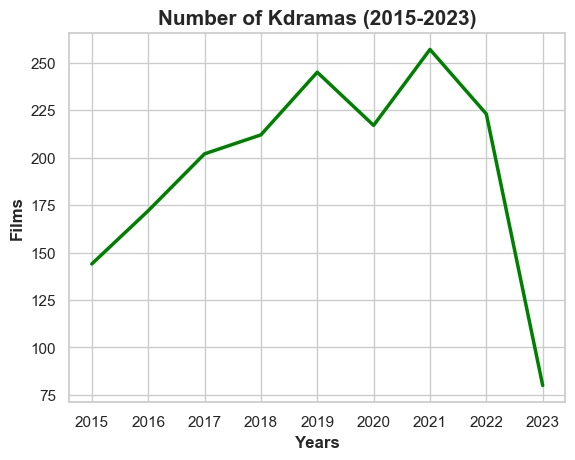

In [109]:
amount= df["Year"].value_counts()
sns.set_style('whitegrid')
sns.lineplot(data=amount, color='green', linewidth=2.5)
plt.xlabel("Years", fontweight = 'bold')
plt.ylabel("Films", fontweight = 'bold')
plt.title("Number of Kdramas (2015-2023)", fontweight = 'bold', fontsize=15)
plt.savefig('D:\Syllabus\PROGRAMMING/numberofdrama.png', dpi=500,bbox_inches='tight')
plt.show()

### Average duration of an episode and average number of episodes in a film

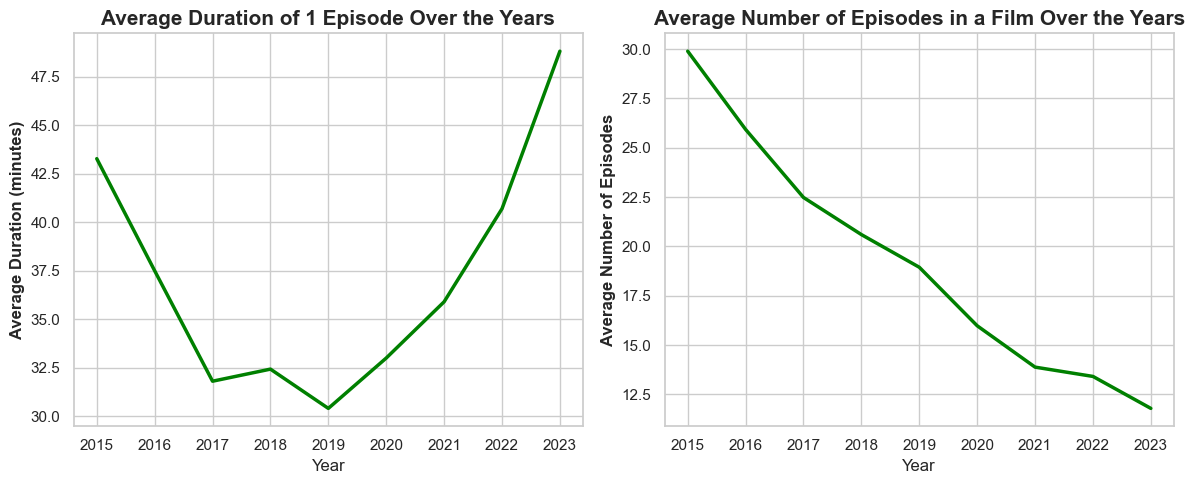

In [110]:
df.sort_values("Duration", ascending=False)

# Group the data by the release year
yearly_avg_duration = df.groupby("Year")["Duration"].mean().reset_index()
yearly_avg_episodes = df.groupby("Year")["Episodes"].mean().reset_index()

# Set the style
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot average duration of 1 episode over the years
sns.lineplot(data=yearly_avg_duration, x="Year", y="Duration", ax=axes[0], color='green', linewidth=2.5)
axes[0].set_title("Average Duration of 1 Episode Over the Years", fontweight = 'bold', fontsize=15)

# Plot average number of episodes in a film over the years
sns.lineplot(data=yearly_avg_episodes, x="Year", y="Episodes", ax=axes[1], color='green', linewidth=2.5)
axes[1].set_title("Average Number of Episodes in a Film Over the Years", fontweight = 'bold', fontsize=15)

# Customize the plot further if needed
axes[0].set_ylabel("Average Duration (minutes)", fontweight = 'bold')
axes[1].set_ylabel("Average Number of Episodes", fontweight = 'bold')
plt.tight_layout()
plt.savefig('D:\Syllabus\PROGRAMMING/avg-duration-episode.png', dpi=500,bbox_inches='tight')
plt.show()


### Number of films by Content Rating

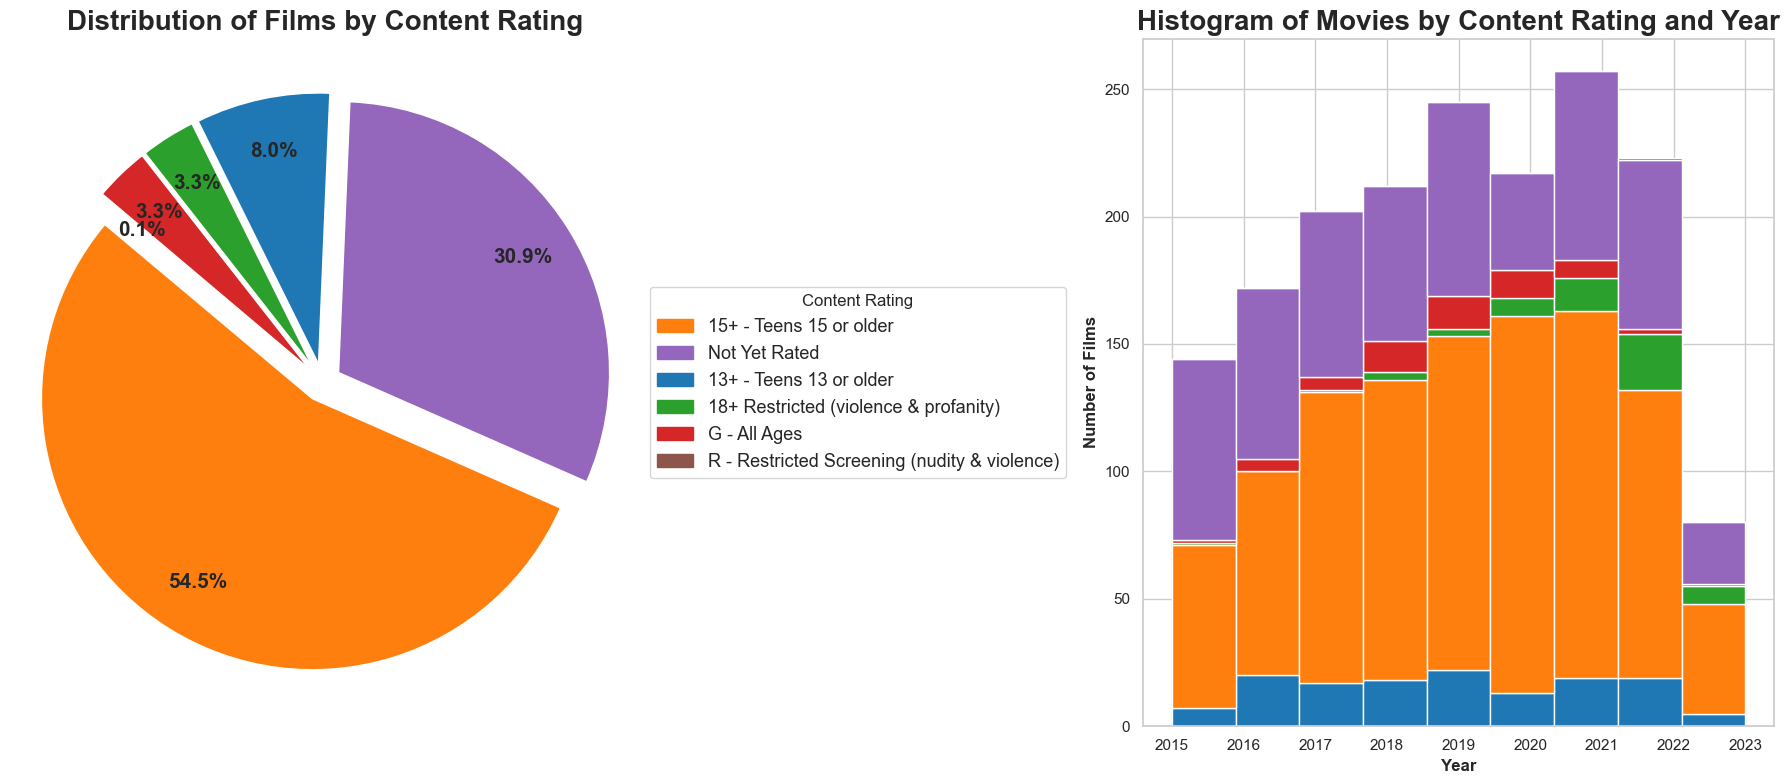

In [322]:
import matplotlib.patches as mpatches

# Count the number of films in each Content Rating category
rating_counts = df['ContentRating'].value_counts()

# Create a color mapping for each Content Rating category
color_mapping = {
    '13+ - Teens 13 or older': 'tab:blue',
    '15+ - Teens 15 or older': 'tab:orange',
    '18+ Restricted (violence & profanity)': 'tab:green',
    'G - All Ages': 'tab:red',
    'Not Yet Rated': 'tab:purple',
    'R - Restricted Screening (nudity & violence)': 'tab:brown'
}

# Create a pie chart using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(18,8))

# Plot the pie chart
wedges, texts, autotexts = axes[0].pie(
    rating_counts, colors=[color_mapping[label] for label in rating_counts.index],
    autopct='%1.1f%%', startangle=140,
    textprops={'fontsize': 15, 'fontweight': 'bold'},
    pctdistance=0.8,  # Move the percentage text inside the slices
    explode=(0.07, 0.07, 0.07, 0.07, 0.07, 0.07)  # Explode a slice for emphasis
)

# Create a custom legend for the Content Rating categories and their colors
legend_labels = [mpatches.Patch(color=color_mapping[label], label=label) for label in rating_counts.index]

# Add the legend to the first plot
axes[0].legend(handles=legend_labels, title="Content Rating", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=13)
axes[0].set_title('Distribution of Films by Content Rating', fontsize=20, fontweight='bold')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the Seaborn style
sns.set(style='whitegrid', palette='tab10')

# Create a histogram using Matplotlib
list1 = [df[df.ContentRating == gen].Year for gen in df.ContentRating.cat.categories]
mylabels = df.ContentRating.cat.categories
h = axes[1].hist(list1, bins=9, stacked=True, rwidth=1, label=mylabels, color=[color_mapping[label] for label in mylabels])

# Add the legend to the second plot
# axes[1].legend(title='Content Rating', loc='upper right', bbox_to_anchor=(1.4, 1))
axes[1].set_title('Histogram of Movies by Content Rating and Year', fontsize=20, fontweight='bold')
axes[1].set_xlabel('Year', fontweight='bold')
axes[1].set_ylabel('Number of Films', fontweight='bold')

# Save the combined figure
plt.tight_layout()
plt.savefig('D:\Syllabus\PROGRAMMING/Combined charts of Movies by Content Rating.png', dpi=500, bbox_inches='tight')

# Show the combined chart
plt.show()


### Streaming Platforms Evolution

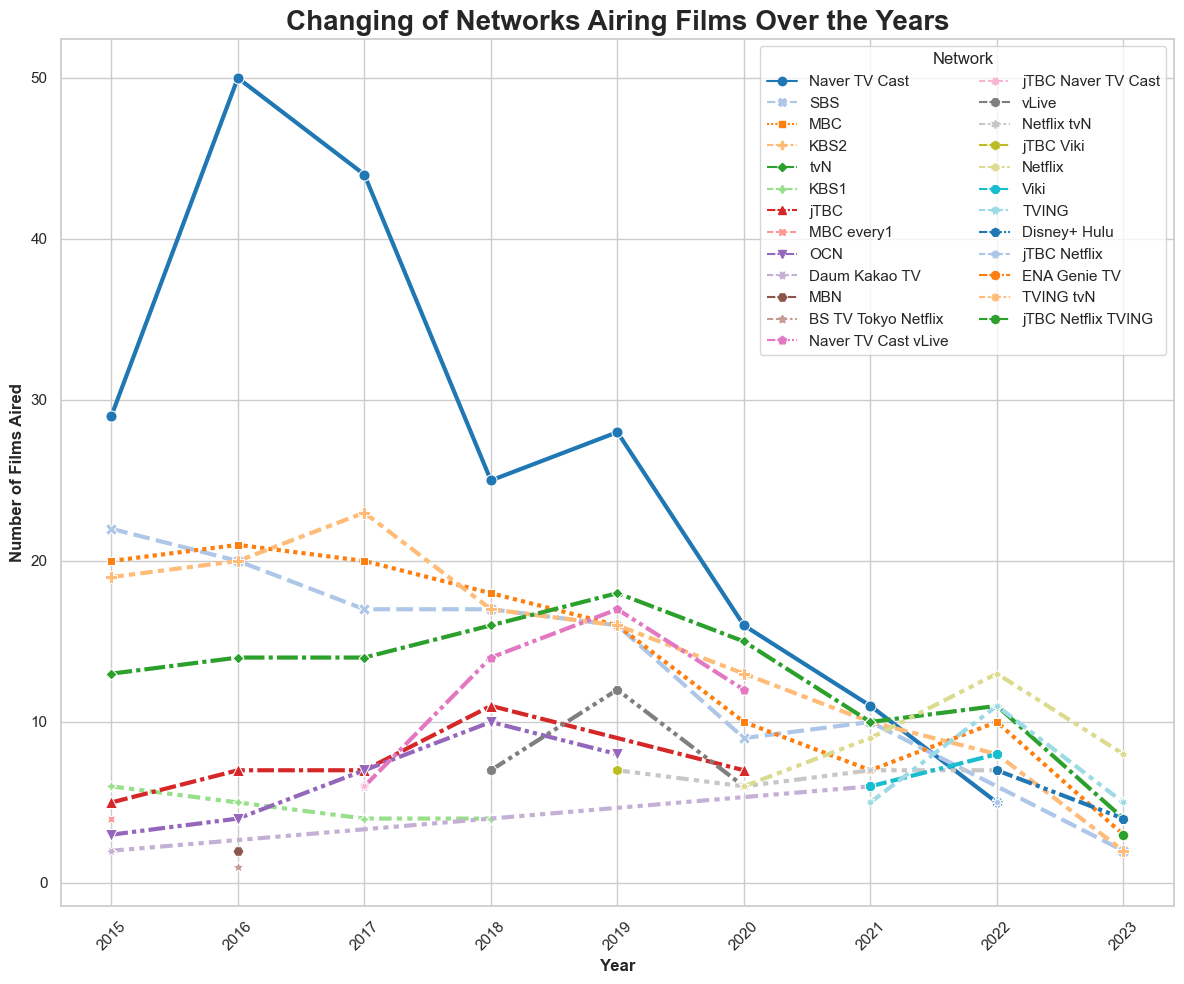

In [112]:
# Group the data by the release year and network to count the number of films aired on each network each year
yearly_network_counts = df.groupby(['Year', 'Network'])['Film'].count().reset_index()
# Sort the data by year and count in descending order
network_counts = yearly_network_counts.sort_values(['Year', 'Film'], ascending=[True, False])

# Get the top 10 networks for each year
top_networks_by_year = network_counts.groupby('Year').head(10)
# Set the style
sns.set_style('whitegrid')

# Create a line plot to visualize the changing of networks airing films over the years
plt.figure(figsize=(12,10))
sns.lineplot(data=top_networks_by_year, x='Year', y='Film', hue='Network', linewidth=3, markers=True, markersize=8,style='Network', palette='tab20')
# for network, data in top_networks_by_year.groupby('Network'):
#     for i, year in enumerate(data['Year']):
#         # Add data labels (legends) beside each line
#         plt.text(year, data['Film'].iloc[i], network, fontsize=5, ha='right', va='center', fontweight='bold')
plt.title('Changing of Networks Airing Films Over the Years',fontweight = 'bold', fontsize=20)
plt.xlabel('Year',fontweight = 'bold')
plt.ylabel('Number of Films Aired',fontweight = 'bold')
plt.legend(title='Network', loc='best', ncol=2, bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('D:\Syllabus\PROGRAMMING/networkchanging.png', dpi=500,bbox_inches='tight')
plt.show()

## Ranking and Popularity Ranking

### Correlation between ranking and popularity ranking

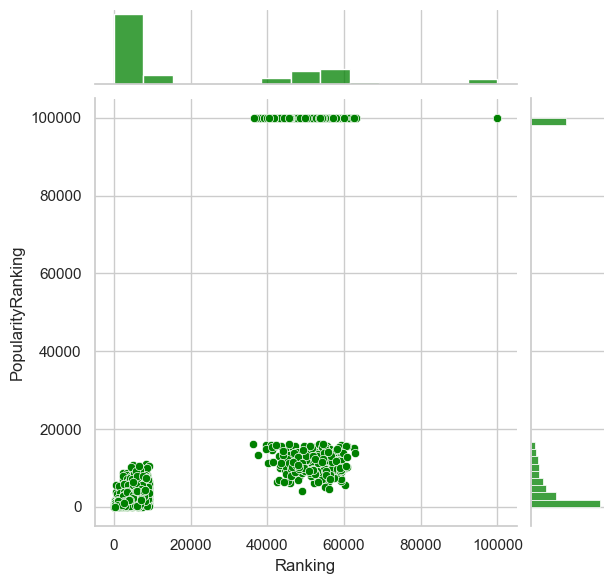

In [325]:
sns.jointplot(data=df, x='Ranking', y='PopularityRanking', color='green')
plt.xlabel('Ranking',fontweight = 'bold', fontsize=30)
plt.ylabel('Popularity Ranking',fontweight = 'bold',fontsize=30)
plt.savefig('D:\Syllabus\PROGRAMMING/jointplot-rank-pop.png', dpi=500,bbox_inches='tight')
plt.show()

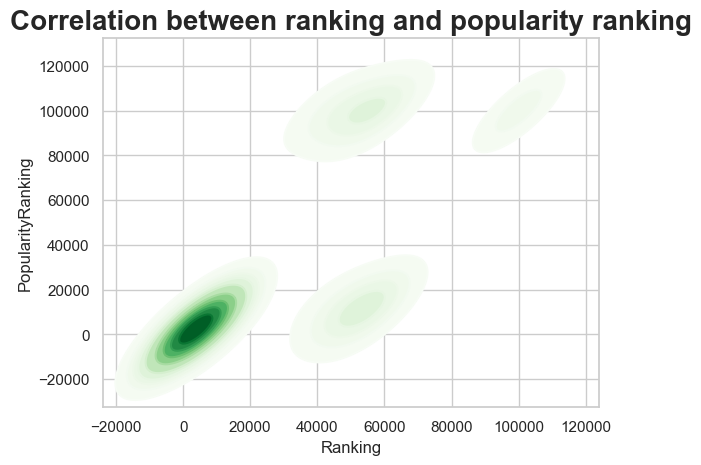

In [326]:
k1 = sns.kdeplot(df.Ranking,df.PopularityRanking, 
                 shade=True, shade_lowest=False,cmap='Greens')
k1b = sns.kdeplot(df.Ranking,df.PopularityRanking, cmap='Greens') #make it look smoother
plt.title('Correlation between ranking and popularity ranking',fontweight = 'bold', fontsize=20)

plt.savefig('D:\Syllabus\PROGRAMMING/kdeplot-rank-pop.png', dpi=500,bbox_inches='tight')
plt.show()

### Boxplots of Ranking and Popularity Ranking by Content Rating categories

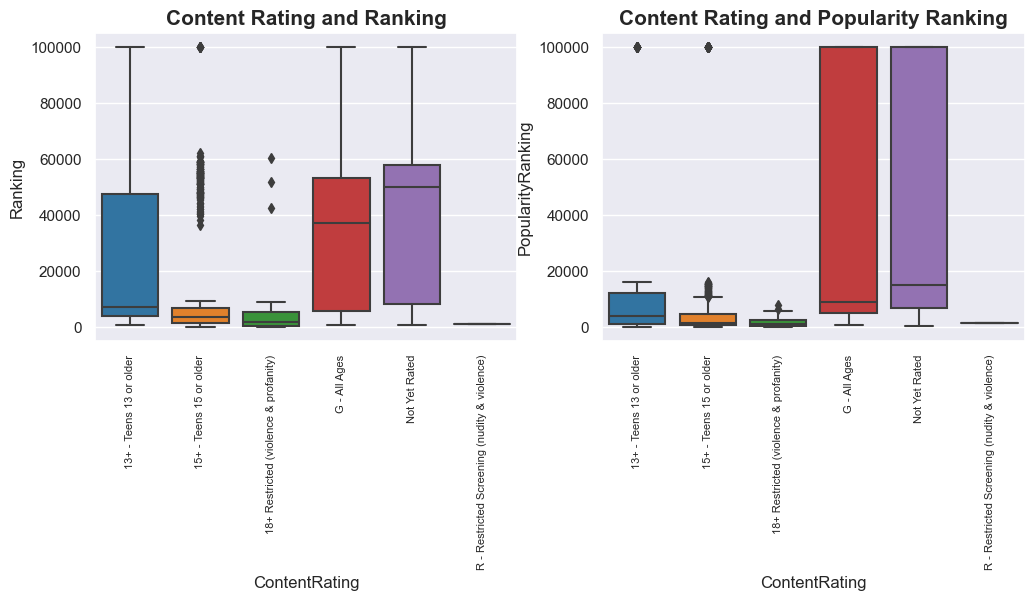

In [296]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=df, x='ContentRating', y='Ranking', palette='tab10',ax=axes[0])
axes[0].set_title("Content Rating and Ranking", fontweight = 'bold', fontsize=15)
sns.boxplot(data=df, x='ContentRating', y='PopularityRanking', palette='tab10',ax=axes[1])
axes[1].set_title("Content Rating and Popularity Ranking", fontweight = 'bold', fontsize=15)
labels = ['13+ - Teens 13 or older', '15+ - Teens 15 or older',
       '18+ Restricted (violence & profanity)', 'G - All Ages',
       'Not Yet Rated', 'R - Restricted Screening (nudity & violence)']
axes[0].set_xticklabels(labels, rotation = 90, fontsize=8)
axes[1].set_xticklabels(labels, rotation = 90, fontsize=8)
plt.savefig('D:\Syllabus\PROGRAMMING/boxplot-contentrating-rankpop.png', dpi=500,bbox_inches='tight')
plt.show()

### Top KDramas with highest ranking and popularity ranking

In [117]:
# Top 10 Drama according to rank
top10rank_film = pd.DataFrame(df.groupby('Film')[['Film','Ranking']].mean().sort_values('Ranking', ascending=True).round(2).head(10)).merge(df[['Film', 'Year']], on='Film', how='left')
top10rank_film

,Film,Ranking,Year
0,Move to Heaven,9.0,2021
1,Weak Hero Class 1,15.0,2022
2,Hospital Playlist Season 2,17.0,2021
3,Flower of Evil,19.0,2020
4,Hospital Playlist,23.0,2020
5,Alchemy of Souls,24.0,2022
6,Reply 1988,26.0,2015
7,My Mister,33.0,2018
8,Under the Queen's Umbrella,40.0,2022
9,Prison Playbook,46.0,2017


In [119]:
# Top 10 Drama according to rank
top10pop_film = pd.DataFrame(df.groupby('Film')[['Film','PopularityRanking']].mean().sort_values('PopularityRanking', ascending=True).round(2).head(10)).merge(df[['Film', 'Year']], on='Film', how='left')
top10pop_film

,Film,PopularityRanking,Year
0,Goblin,1.0,2016
1,Strong Woman Do Bong Soon,2.0,2017
2,Weightlifting Fairy Kim Bok Joo,3.0,2016
3,Descendants of the Sun,4.0,2016
4,What's Wrong with Secretary Kim,5.0,2018
5,W,6.0,2016
6,It's Okay to Not Be Okay,7.0,2020
7,Crash Landing on You,8.0,2019
8,Hotel del Luna,10.0,2019
9,While You Were Sleeping,11.0,2017


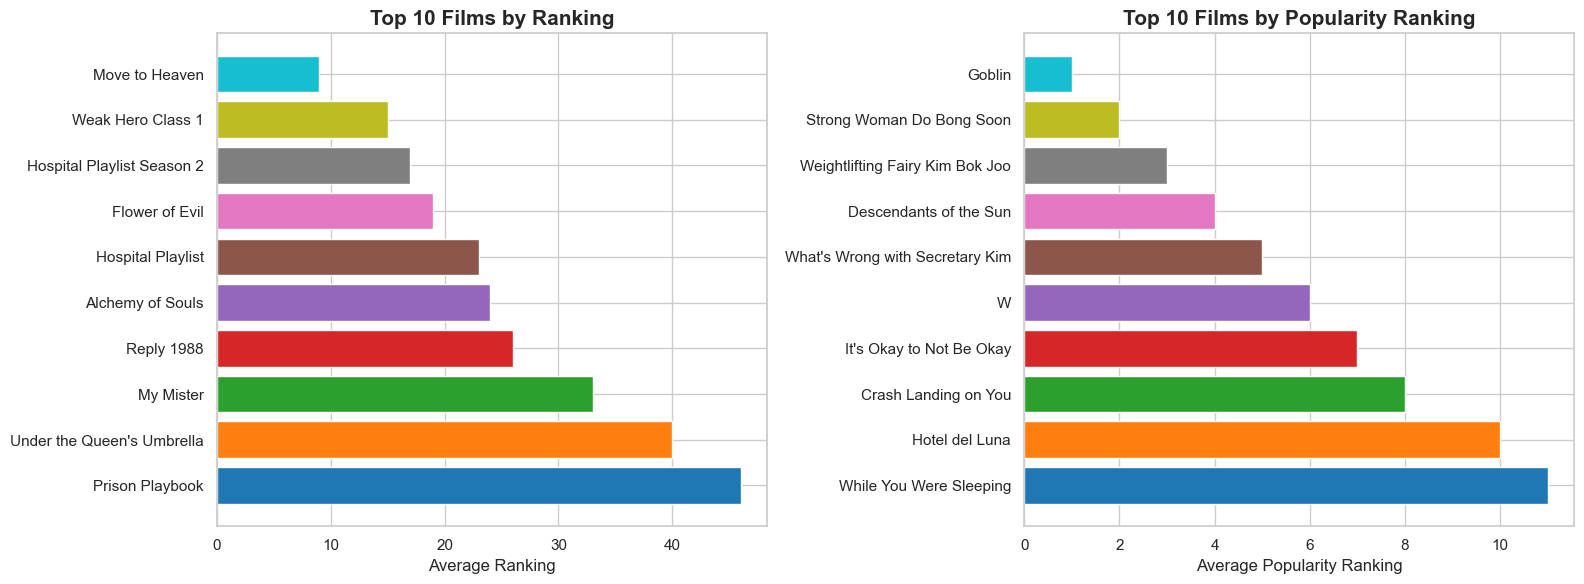

In [120]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Select the DataFrame for top10_rank_film
ranking_df = top10rank_film[::-1]

# Define a color map for the bars
color_map_ranking = plt.get_cmap('tab10', len(ranking_df))

# Assign colors to the bars based on rank for ranking
colors_ranking = [color_map_ranking(rank / len(ranking_df)) for rank in range(len(ranking_df))]

# Create a horizontal bar plot for top 10 films by ranking
axes[0].barh(ranking_df['Film'], ranking_df['Ranking'], color=colors_ranking)

axes[0].set_title('Top 10 Films by Ranking', fontweight='bold', fontsize=15)
axes[0].set_xlabel('Average Ranking')
axes[0].tick_params(axis='y', labelrotation=0)

# Select the DataFrame for top10_pop_film
pop_df = top10pop_film[::-1]

# Define a color map for the bars
color_map_popularity = plt.get_cmap('tab10', len(pop_df))

# Assign colors to the bars based on rank for popularity ranking
colors_popularity = [color_map_popularity(rank / len(pop_df)) for rank in range(len(pop_df))]

# Create a horizontal bar plot for top 10 films by popularity ranking
axes[1].barh(pop_df['Film'], pop_df['PopularityRanking'], color=colors_popularity)

axes[1].set_title('Top 10 Films by Popularity Ranking', fontweight='bold', fontsize=15)
axes[1].set_xlabel('Average Popularity Ranking')
axes[1].tick_params(axis='y', labelrotation=0)

# Adjust layout and display the subplots
plt.tight_layout()
plt.savefig('D:\Syllabus\PROGRAMMING/top10-rank-pop-films.png', dpi=500,bbox_inches='tight')
plt.show()


In [121]:
# Define a threshold for high ranking (you can adjust this threshold as needed)
high_ranking_threshold = 50.0

# Filter the DataFrame to select films with rankings above the threshold
high_ranking_films = df[df['Ranking'] < high_ranking_threshold]

# Group the high-ranking films by year and count the number of films in each year
yearly_high_ranking_counts = high_ranking_films['Year'].value_counts().reset_index()
yearly_high_ranking_counts.columns = ['Year', 'High_Ranking_Films_Count']

# Find the years with the highest number of high-ranking films
highest_rank = yearly_high_ranking_counts['High_Ranking_Films_Count'].max()
years_with_highest_rank = yearly_high_ranking_counts[yearly_high_ranking_counts['High_Ranking_Films_Count'] == highest_rank]

# Print the years with the highest number of high-ranking films
print("Years with the highest number of high-ranking films:")
print(years_with_highest_rank)

Years with the highest number of high-ranking films:
   Year  High_Ranking_Films_Count
0  2020                         3
1  2022                         3


In [122]:
# Define a threshold for high ranking (you can adjust this threshold as needed)
high_pop_threshold = 50.0

# Filter the DataFrame to select films with rankings above the threshold
high_pop_films = df[df['PopularityRanking'] < high_pop_threshold]

# Group the high-ranking films by year and count the number of films in each year
yearly_high_pop_counts = high_pop_films['Year'].value_counts().reset_index()
yearly_high_pop_counts.columns = ['Year', 'High_Popularity_Films_Count']

# Find the years with the highest number of high-ranking films
highest_pop = yearly_high_pop_counts['High_Popularity_Films_Count'].max()
years_with_highest_pop = yearly_high_pop_counts[yearly_high_pop_counts['High_Popularity_Films_Count'] == highest_pop]

# Print the years with the highest number of high-ranking films
print("Years with the highest number of high-popularity-ranking films:")
print(years_with_highest_pop)


Years with the highest number of high-popularity-ranking films:
   Year  High_Popularity_Films_Count
0  2016                           10


In [124]:
from tabulate import tabulate
print("Top 10 Dramas with Highest Ranking:")
print(tabulate(top10rank_film, headers="keys", tablefmt="grid"))
print("\nTop 10 Dramas with Highest Popularity Ranking:")
print(tabulate(top10pop_film, headers="keys", tablefmt="grid"))
print("\nYears with the highest number of high-ranking films:")
print(tabulate(years_with_highest_rank, headers="keys", tablefmt="grid"))
print("\nYears with the highest number of high-popularity-ranking films:")
print(tabulate(years_with_highest_pop, headers="keys", tablefmt="grid"))

Top 10 Dramas with Highest Ranking:
+----+----------------------------+-----------+--------+
|    | Film                       |   Ranking |   Year |
+====+============================+===========+========+
|  0 | Move to Heaven             |         9 |   2021 |
+----+----------------------------+-----------+--------+
|  1 | Weak Hero Class 1          |        15 |   2022 |
+----+----------------------------+-----------+--------+
|  2 | Hospital Playlist Season 2 |        17 |   2021 |
+----+----------------------------+-----------+--------+
|  3 | Flower of Evil             |        19 |   2020 |
+----+----------------------------+-----------+--------+
|  4 | Hospital Playlist          |        23 |   2020 |
+----+----------------------------+-----------+--------+
|  5 | Alchemy of Souls           |        24 |   2022 |
+----+----------------------------+-----------+--------+
|  6 | Reply 1988                 |        26 |   2015 |
+----+----------------------------+-----------+-----

### Top 10 in each feature in relation to Ranking and Popularity Ranking

#### Main Cast (Actor/Actress)

In [125]:
# Explode the list of actors into separate rows
exploded_df = df_merged.explode('Actor_name')

# Calculate the average rank for each actor
actor_avg_rank = round(exploded_df.groupby('Actor_name')['Ranking'].mean(),1).reset_index()
actor_avg_rank = actor_avg_rank.rename(columns={'Ranking': 'avg_rank'})

# Sort the results by avg_rank
actor_avg_rank = actor_avg_rank.sort_values(by='avg_rank')

# Display the top rows
top10rank_cast = actor_avg_rank.head(10)
top10rank_cast

,Actor_name,avg_rank
1083,Kim Su Gyeom,15.0
403,Heo Yool,49.0
305,Go Youn Jung,56.0
742,Jung Sung Il,59.5
2027,Yoo In Soo,75.0
2001,Yeom Hye Ran,81.3
882,Kim Eui Sung,91.3
1936,Tang Jun Sang,93.5
26,Ahn Suk Hwan,125.0
419,Hong Kyung,125.5


In [126]:
# Explode the list of actors into separate rows
exploded_df = df_merged.explode('Actor_name')

# Calculate the average rank for each actor
actor_avg_pop = round(exploded_df.groupby('Actor_name')['PopularityRanking'].mean(),1).reset_index()
actor_avg_pop = actor_avg_pop.rename(columns={'PopularityRanking': 'avg_pop'})

# Sort the results by avg_rank
actor_avg_pop = actor_avg_pop.sort_values(by='avg_pop')

# Display the top rows
top10pop_cast = actor_avg_pop.head(10)
top10pop_cast

,Actor_name,avg_pop
696,Jung Ho Yeon,24.0
1681,Park Seo Joon,25.2
1593,Park Bo Young,44.8
858,Kim Da Mi,51.0
356,Han Hyo Joo,53.0
679,Jung Da Sol,64.0
26,Ahn Suk Hwan,70.0
834,Kim Bo Mi,73.0
1626,Park Hwan Hee,99.0
1300,Lee Jong Suk,103.4


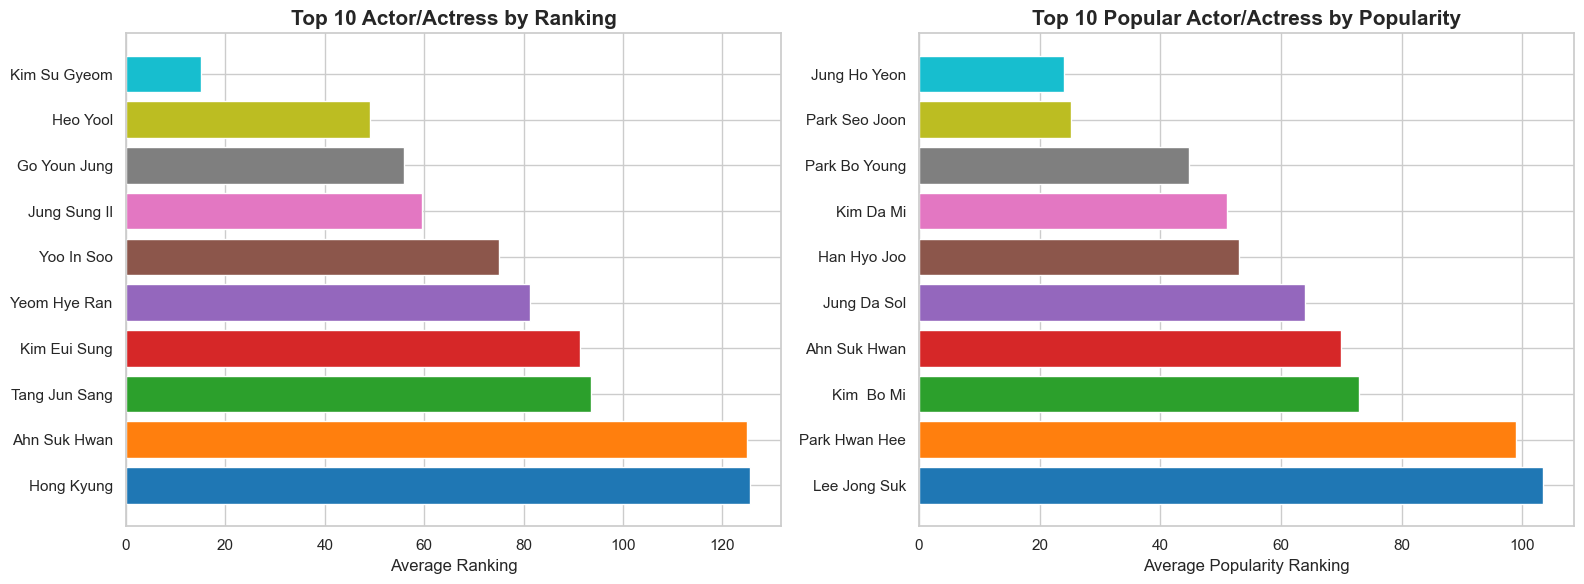

In [127]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Select the DataFrame for top10rank_cast
ranking_df = top10rank_cast[::-1]

# Define a color map for the bars
color_map_ranking = plt.get_cmap('tab10', len(ranking_df))

# Assign colors to the bars based on rank for ranking
colors_ranking = [color_map_ranking(rank / len(ranking_df)) for rank in range(len(ranking_df))]

# Create a horizontal bar plot for top 10 actors/actresses by ranking
axes[0].barh(ranking_df['Actor_name'], ranking_df['avg_rank'], color=colors_ranking)

axes[0].set_title('Top 10 Actor/Actress by Ranking', fontweight='bold', fontsize=15)
axes[0].set_xlabel('Average Ranking')
axes[0].tick_params(axis='y', labelrotation=0)

# Select the DataFrame for top10pop_cast
pop_df = top10pop_cast[::-1]

# Define a color map for the bars
color_map_popularity = plt.get_cmap('tab10', len(pop_df))

# Assign colors to the bars based on rank for popularity
colors_popularity = [color_map_popularity(rank / len(pop_df)) for rank in range(len(pop_df))]

# Create a horizontal bar plot for top 10 popular actors/actresses by popularity
axes[1].barh(pop_df['Actor_name'], pop_df['avg_pop'], color=colors_popularity)

axes[1].set_title('Top 10 Popular Actor/Actress by Popularity', fontweight='bold', fontsize=15)
axes[1].set_xlabel('Average Popularity Ranking')
axes[1].tick_params(axis='y', labelrotation=0)

# Adjust layout and display the subplots
plt.tight_layout()
plt.savefig('D:\Syllabus\PROGRAMMING/top10-cast.png', dpi=500,bbox_inches='tight')
plt.show()

In [128]:
def top_avg_ranking(group_column):
    # Group by the specified column and calculate the average ranking
    avg_rank = df.groupby(group_column)['Ranking'].mean().reset_index()
    avg_rank = avg_rank.rename(columns={'Ranking': 'avg_rank'})
    # Sort the results by average ranking
    return avg_rank.sort_values(by='avg_rank').head(10)
def top_avg_popularity(group_column):
    # Group by the specified column and calculate the average ranking
    avg_pop = df.groupby(group_column)['PopularityRanking'].mean().reset_index()
    avg_pop = avg_pop.rename(columns={'PopularityRanking': 'avg_pop'})
    # Sort the results by average ranking
    return avg_pop.sort_values(by='avg_pop').head(10)

top10rank_screenwriter = top_avg_ranking('Screenwriter')
top10rank_director = top_avg_ranking('Director')
top10rank_airdate = top_avg_ranking('AirDate')
top10rank_network = top_avg_ranking('Network')

top10pop_screenwriter = top_avg_popularity('Screenwriter')
top10pop_director = top_avg_popularity('Director')
top10pop_airdate = top_avg_popularity('AirDate')
top10pop_network = top_avg_popularity('Network')

In [129]:
from tabulate import tabulate
print("Screenwriter Top 10 Ranking:")
print(tabulate(top10rank_screenwriter, headers="keys", tablefmt="grid"))
print("\nDirector Top 10 Ranking:")
print(tabulate(top10rank_director, headers="keys", tablefmt="grid"))
print("\nAirDate Top 10 Ranking:")
print(tabulate(top10rank_airdate, headers="keys", tablefmt="grid"))
print("\nNetwork Top 10 Ranking:")
print(tabulate(top10rank_network, headers="keys", tablefmt="grid"))
print("\nActors/Actress Top 10 Ranking:")
print(tabulate(top10rank_cast, headers="keys", tablefmt="grid"))

Screenwriter Top 10 Ranking:
+-----+---------------------------------------------+------------+
|     | Screenwriter                                |   avg_rank |
+=====+=============================================+============+
| 590 | ['Yoon Ji Ryun']                            |          9 |
+-----+---------------------------------------------+------------+
| 403 | ['Lee Woo Jung']                            |         22 |
+-----+---------------------------------------------+------------+
| 450 | ['Park Ba Ra']                              |         40 |
+-----+---------------------------------------------+------------+
| 186 | ['Jung Bo Hoon', 'Lee Woo Jung']            |         46 |
+-----+---------------------------------------------+------------+
| 478 | ['Park Kye Ok', 'Choi Ah Il']               |         48 |
+-----+---------------------------------------------+------------+
| 423 | ['Moon Ji Won']                             |         60 |
+-----+--------------------------

In [130]:
from tabulate import tabulate
print("Screenwriter Top 10 Popularity Ranking:")
print(tabulate(top10pop_screenwriter, headers="keys", tablefmt="grid"))
print("\nDirector Top 10 Popularity Ranking:")
print(tabulate(top10pop_director, headers="keys", tablefmt="grid"))
print("\nAirDate Top 10 Popularity Ranking:")
print(tabulate(top10pop_airdate, headers="keys", tablefmt="grid"))
print("\nNetwork Top 10 Popularity Ranking:")
print(tabulate(top10pop_network, headers="keys", tablefmt="grid"))
print("\nActors/Actress Top 10 Popularity Ranking:")
print(tabulate(top10pop_cast, headers="keys", tablefmt="grid"))

Screenwriter Top 10 Popularity Ranking:
+-----+---------------------------------------------------+-----------+
|     | Screenwriter                                      |   avg_pop |
+=====+===================================================+===========+
| 560 | ['Yang Hee Seung', 'Kim Soo Jin']                 |         3 |
+-----+---------------------------------------------------+-----------+
| 245 | ['Kim Eun Sook', 'Kim Won Seok']                  |         4 |
+-----+---------------------------------------------------+-----------+
| 179 | ['Jo Yoon Young']                                 |        16 |
+-----+---------------------------------------------------+-----------+
|  35 | ['Cho Kwang Jin']                                 |        19 |
+-----+---------------------------------------------------+-----------+
| 313 | ['Kim Sun Mi']                                    |        20 |
+-----+---------------------------------------------------+-----------+
| 101 | ['Han Sul Hee', 

#### Screenwriters and Directors

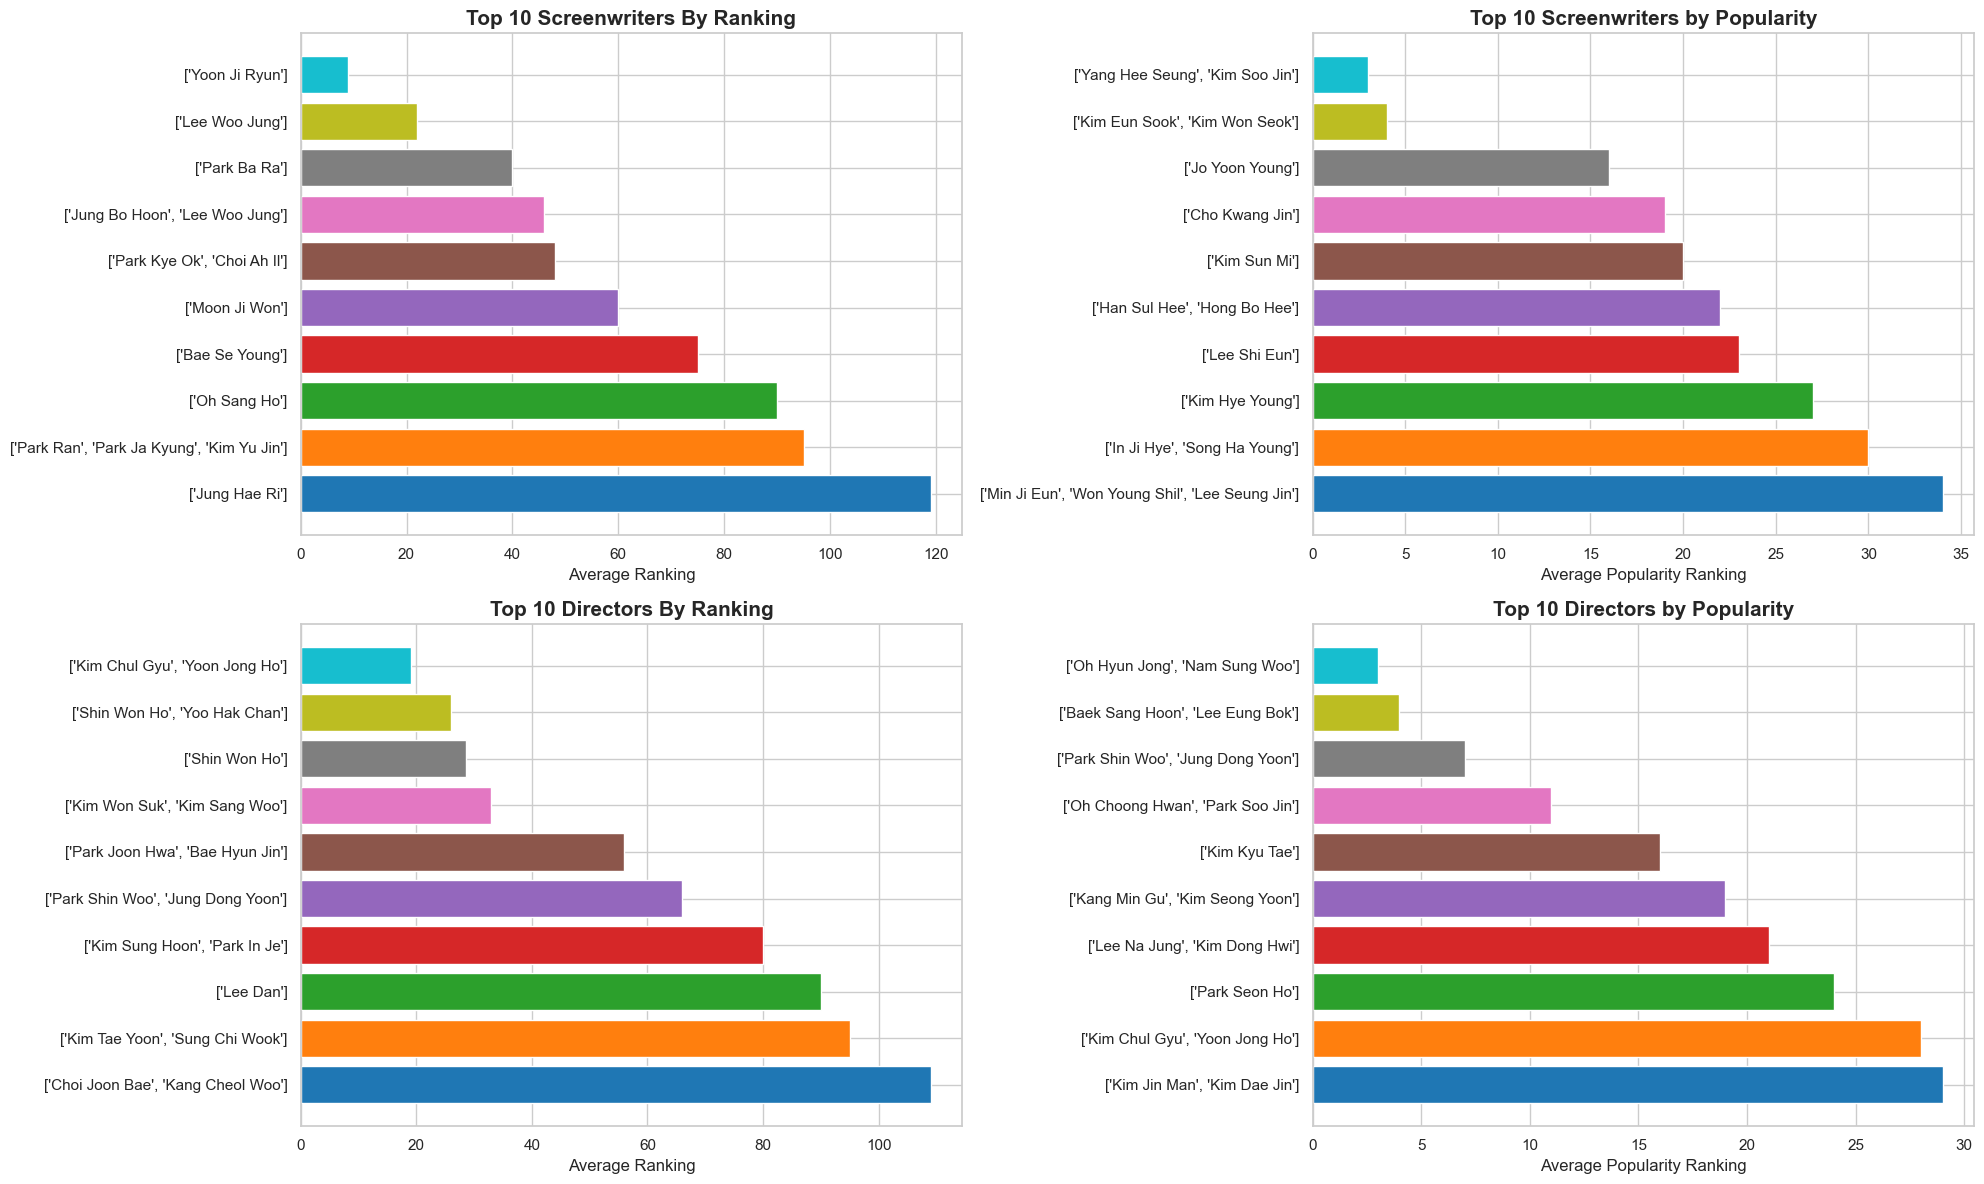

In [131]:
import matplotlib.pyplot as plt

# Create a figure with 4x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# List of the DataFrames and their titles for the top rankings
top_rankings = [top10rank_screenwriter, top10rank_director]
ranking_titles = ['Top 10 Screenwriters By Ranking', 'Top 10 Directors By Ranking']
# Define a color map for the bars
color_map_ranking = plt.get_cmap('tab10', len(top_rankings[0]))

for i, ax in enumerate(axes[:, 0]):
    ranking_df = top_rankings[i][::-1]
    
    # Assign colors to the bars based on rank
    colors = [color_map_ranking(rank / len(ranking_df)) for rank in range(len(ranking_df))]
    
    ax.barh(ranking_df['Screenwriter' if i == 0 else 'Director'],
            ranking_df['avg_rank'],
            color=colors)
    ax.set_title(ranking_titles[i], fontweight='bold', fontsize=15)
    ax.set_xlabel('Average Ranking')

# List of the DataFrames and their titles for the top popularity rankings
top_popularity = [top10pop_screenwriter, top10pop_director]
popularity_titles = ['Top 10 Screenwriters by Popularity', 'Top 10 Directors by Popularity']

# Define a color map for the bars
color_map_popularity = plt.get_cmap('tab10', len(top_popularity[0]))

for i, ax in enumerate(axes[:, 1]):
    pop_df = top_popularity[i][::-1]
    
    # Assign colors to the bars based on rank
    colors = [color_map_popularity(rank / len(pop_df)) for rank in range(len(pop_df))]
    
    ax.barh(pop_df['Screenwriter' if i == 0 else 'Director'],
            pop_df['avg_pop'],
            color=colors)
    ax.set_title(popularity_titles[i], fontweight='bold', fontsize=15)
    ax.set_xlabel('Average Popularity Ranking')

# Adjust layout and display the subplots
plt.tight_layout()
plt.savefig('D:\Syllabus\PROGRAMMING/top10-screen-direct.png', dpi=500,bbox_inches='tight')

plt.show()


#### Air Dates and Networks

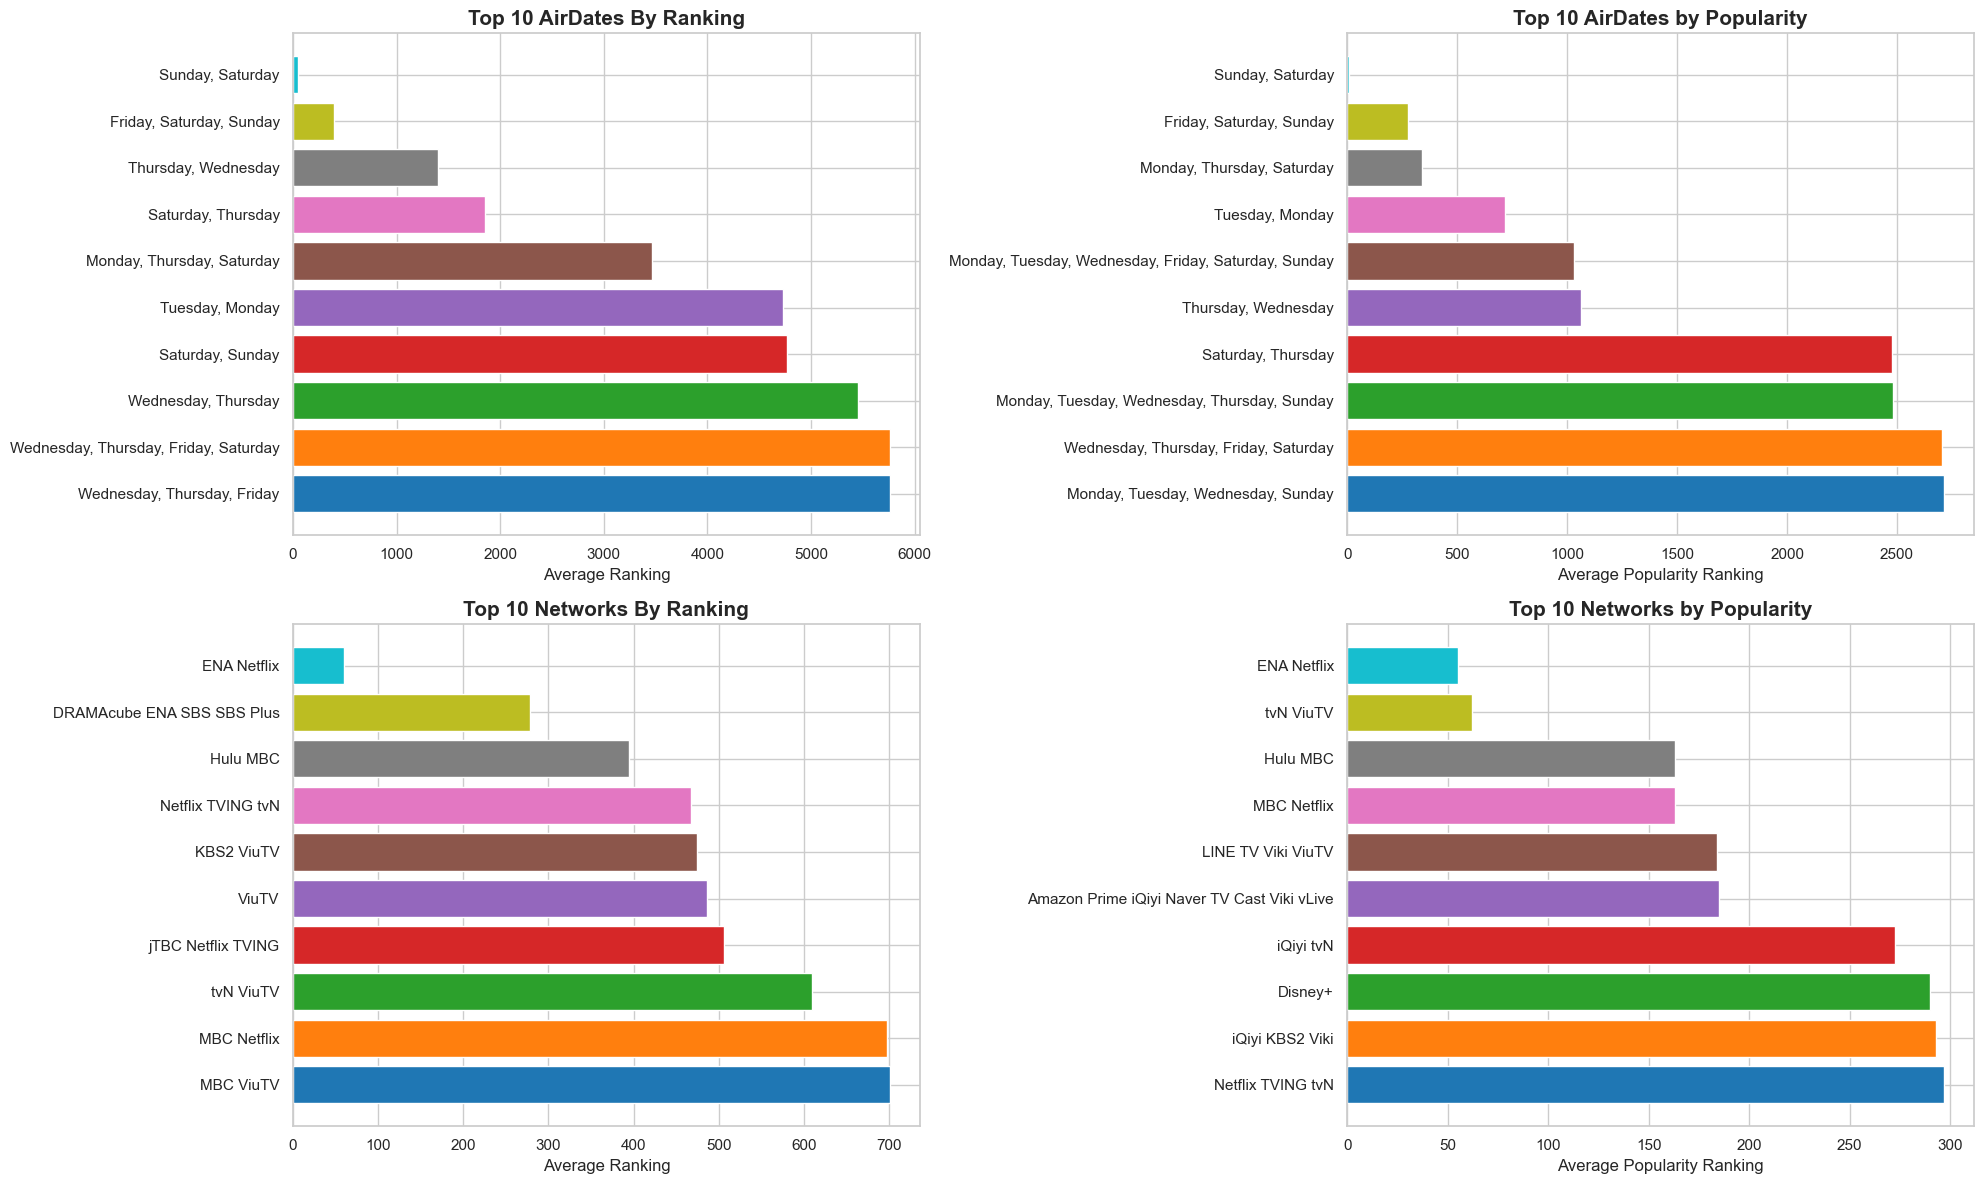

In [132]:
import matplotlib.pyplot as plt

# Create a figure with 4x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20,12))

# List of the DataFrames and their titles for the top rankings
top_rankings = [top10rank_airdate, top10rank_network]
ranking_titles = ['Top 10 AirDates By Ranking', 'Top 10 Networks By Ranking']

# Define a color map for the bars
color_map_ranking = plt.get_cmap('tab10', len(top_rankings[0]))

for i, ax in enumerate(axes[:, 0]):
    ranking_df = top_rankings[i][::-1]
    
    # Assign colors to the bars based on rank
    colors = [color_map_ranking(rank / len(ranking_df)) for rank in range(len(ranking_df))]
    
    ax.barh(ranking_df['AirDate' if i == 0 else 'Network'],
            ranking_df['avg_rank'],
            color=colors)
    ax.set_title(ranking_titles[i], fontweight='bold', fontsize=15)
    ax.set_xlabel('Average Ranking')

# List of the DataFrames and their titles for the top popularity rankings
top_popularity = [top10pop_airdate, top10pop_network]
popularity_titles = ['Top 10 AirDates by Popularity', 'Top 10 Networks by Popularity']

# Define a color map for the bars
color_map_popularity = plt.get_cmap('tab10', len(top_popularity[0]))

for i, ax in enumerate(axes[:, 1]):
    pop_df = top_popularity[i][::-1]
    
    # Assign colors to the bars based on rank
    colors = [color_map_popularity(rank / len(pop_df)) for rank in range(len(pop_df))]
    
    ax.barh(pop_df['AirDate' if i == 0 else 'Network'],
            pop_df['avg_pop'],
            color=colors)
    ax.set_title(popularity_titles[i], fontweight='bold', fontsize=15)
    ax.set_xlabel('Average Popularity Ranking')

# Adjust layout and display the subplots
plt.tight_layout()
plt.savefig('D:\Syllabus\PROGRAMMING/top10-airdate-networks.png', dpi=500,bbox_inches='tight')

plt.show()
